## Leave-One-Out Cross-Validation

Using a `KNN-Regressor` to train the model and then predict the values of the test dataset we use the LOOCV method to reduce the uncertainty and find out which is the optimal hyperparameter K for the predcition 

#### KNN Regresson Function 

In [1]:
# KNN regressor function
knn.reg <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    # Convert the data to dataframe
    if(!is.data.frame(train.data)){ # If train.data is not a dataframe
        train.data = data.frame(train.data) # Build a dataframe with a vector 
        names(train.data)  <- c('n') # Change the name of the unique column to match with test 
    }
    if(!is.data.frame(test.data)){ # If test.data is not a dataframe
        test.data = data.frame(test.data) # Build a dataframe with a vector 
        names(test.data)  <- c('n') # Change the name of the unique column to match with test 
    }
    
    # Get the number of rows of each dataframe
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    # Creating the returning variable
    test.label <- c()
    
    # Calculate distances between samples and get the important part of the matrix
    dist <- as.matrix(dist(rbind(test.data, train.data), method = distance))[1:test.len, (test.len+1):(test.len+train.len)]

    ## for each test sample
    for (i in 1:test.len){

        # Find its K nearest neighbours from training samples. As the testing data is just one, dist is a vector
        nn <- as.data.frame(sort(dist, index.return = TRUE))[1:K,2]
        
        ### And calculate the predicted labels with the mean
        test.label[i]<- mean(train.label[nn])        
    }
    
    ## return the class labels as output
    return (test.label)
}

#### Import Datasets
As we are going to do cross-validation, we assume that we do not have test data

In [2]:
train.data <- read.csv(file = "data/train.csv")[,1] # First Column 
train.label <- read.csv(file = "data/train.csv")[,2] # Second Column

A special case of L-Fold cross-validation is Leave-One-Out cross-validation where L (i.e., the number of folds/subsets) is equal to the size of the training dataset. In each iteration, one training data point is used as the validation set.
Here we implement a function:

    cv(train.data, train.label, K)

which takes the training data and their labels (continuous values), K value (the number of neighbors), the number of folds, and returns errors for different folds of the training data.

In [3]:
cv <- function(train.data, train.label, K=3){
    
    # Identifying the size of the vector of training
    train.len <- length(train.data)
    
    # Creating the returning variable
    test.label <- c()
    
    # Getting the indexes for the L-Fold cross validation
    lfold_idx <- matrix(sample(x=train.len, size=train.len, replace = FALSE))
    
    # 
    error <- data.frame('L'=1:train.len, 'MSE_train'=rep(0,train.len))
    
    for (i in lfold_idx){
        error[i,'MSE_train'] <- (knn.reg(train.data[-i], train.label[-i], train.data[i], K=K) - train.label[i])^2 # Store the MSE of each fold
    }
    
    # Return the mean of all square errors of each fold
    return(mean(error$MSE_train))
}

### Run Function

Using the training data, we run the Leave-One-Out CV Algorithm, and change the value of K between 1 and 20 in the KNN regressor function, and for each K compute the average error values for each fold.

In [4]:
# calculate the train and test missclassification rates for K in 1:20
miss <- data.frame('K'=1:20, 'MSE_train'=rep(0,20))
for (k in 1:20){
    miss[k,'MSE_train'] <- cv(train.data, train.label, K=k) # Store the MSE of trainning data
}

Finally, we plot the average of error values versus 1/K for K=1,..,20 in your KNN regressor. 

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"Use of `miss$MSE_train` is discouraged. Use `MSE_train` instead."Warning message:
"Use of `miss$MSE_train` is discouraged. Use `MSE_train` instead."Warning message:
"Use of `miss$MSE_train` is discouraged. Use `MSE_train` instead."

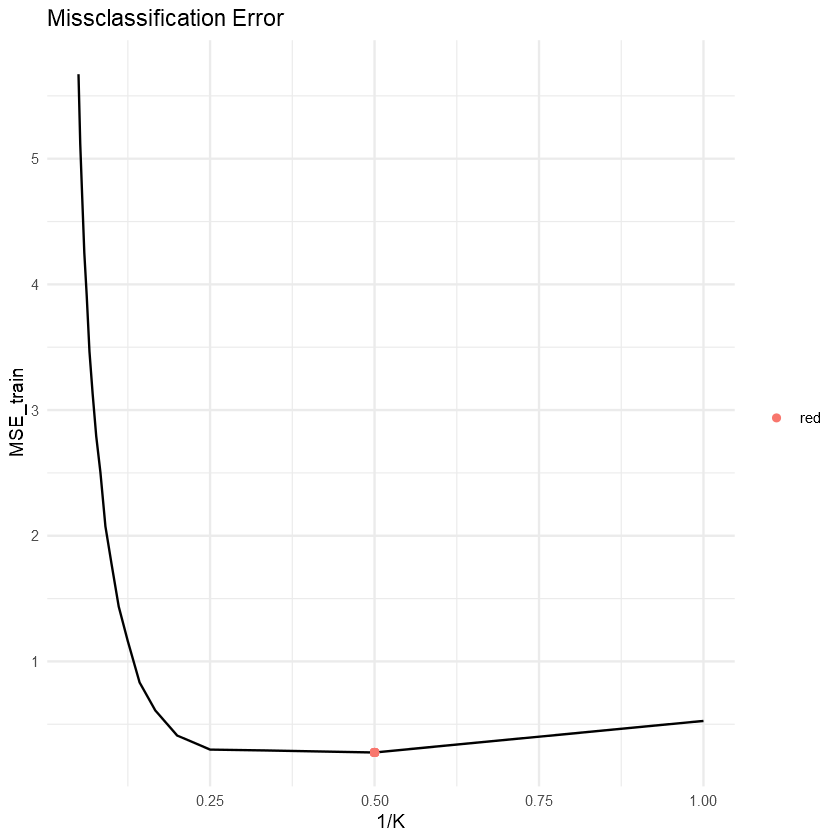

In [5]:
library(ggplot2)
ggplot(data=miss, aes(x=1/K, y=MSE_train)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error") + geom_point(aes(x=1/which.min(miss$MSE_train),y=miss$MSE_train[which.min(miss$MSE_train)], color='red'))

In [7]:
cat("The K that returns the smallest MSE is",which.min(miss$MSE))

The K that returns the smallest MSE is 2

The MSE value is almost the same for K between 2 and 4 as it can be seen in the following table:

In [11]:
miss[miss$K > 1 & miss$K < 5,]

,K,MSE_train
2,2,0.2755512
3,3,0.2921116
4,4,0.2986848


And that is why we can se an almost flat line between these two values. Even though the optimum value is `K = 2`, because is the one that returns the lowest value of MSE as it can be seen in the plot. Therefore, the model with the best performance.

By looking at the graph we can identify the underfitting and overfitting region. When we use a K too big ($\frac{1}{k} \approx 0$), the MSE is too big and it starts to decrease whit the number of K, then we could says that with a too big K the model is underfitted. On the other hand, with a K smaller than 2 the MSE is not that big as it is with high K, but is starts to increase compared with the MSE of K=2, that is why that we say that the model is over fitted when K is smaller than 2.